### Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import tsgm
from tensorflow.keras.optimizers import Adam

from keras.models import Sequential
from keras.layers import LSTM, Dense
from gensim.models import Word2Vec


2024-02-21 14:55:40.407374: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Load the data

In [31]:
df = pd.read_csv("NewTestDataCompiled.csv")
df.columns = ['AmplitudePrimary', 'AmplitudeSecondary', 'Latency', "CorrectiveSaccade", "Normal"]
display(df)
df["Normal"].value_counts()

,AmplitudePrimary,AmplitudeSecondary,Latency,CorrectiveSaccade,Normal
0,7.905335,0.907229,0.124998,7.0,0.0
1,17.381435,0.563108,0.341670,13.0,0.0
2,29.415535,1.097195,0.308346,16.0,0.0
3,10.173487,1.182019,0.175026,9.0,0.0
4,6.801426,7.733378,0.391700,28.0,0.0
5,7.733378,11.071244,0.075037,26.0,0.0
6,12.924696,1.971763,0.233333,16.0,0.0
7,5.696865,16.259921,0.083340,35.0,0.0
8,16.259921,23.513123,0.000011,12.0,0.0
9,23.513123,1.198840,0.000022,14.0,0.0


Normal
0.0    137
1.0    119
Name: count, dtype: int64

# Embedding - Word2Vec

In [11]:
# Assuming df contains textual data
word_embedding_model = Word2Vec(sentences=df.values.tolist(), vector_size=50, window=5, min_count=1, workers=4)
# print(df.values.flatten().tolist())
word_vectors = word_embedding_model.wv.key_to_index
print(word_vectors)
# # Filter out non-textual features before accessing word embeddings
# textual_features = [feature for feature in df.values.flatten().tolist() if str(feature) in word_embedding_model.wv]

# # Calculate the mean word embedding for the textual features
# word_embedding = np.mean([word_embedding_model.wv[str(feature)] for feature in textual_features], axis=0)


{0.0: 0, 1.0: 1, 12.0: 2, 9.0: 3, 16.0: 4, 10.0: 5, 15.0: 6, 13.0: 7, 4.0: 8, 17.0: 9, 18.0: 10, 11.0: 11, 20.0: 12, 7.0: 13, 22.0: 14, 5.0: 15, 6.0: 16, 8.0: 17, 19.0: 18, 23.0: 19, 0.008333: 20, 14.0: 21, 1.09999999997612e-05: 22, 26.0: 23, 3.0: 24, 21.0: 25, 32.44580710399252: 26, 0.4003521919650133: 27, 20.87109359061164: 28, 0.1619248682220552: 29, 31.10182361549491: 30, 18.87433622262196: 31, 1.0711990063600922: 32, 24.0: 33, 3.799999999998249e-05: 34, 31.250888651595623: 35, 30.0: 36, 2.0000000000131024e-05: 37, 0.050001: 38, 2.899999999961267e-05: 39, 3.999999999848569e-05: 40, 28.0: 41, 3.948713450321093: 42, 23.51312299510805: 43, 0.3960039239945463: 44, 0.00835: 45, 0.8798321072479919: 46, 1.1820187930657182: 47, 0.447605536929071: 48, 9.999999999621425e-06: 49, 7.7333782761743874: 50, 4.313226518235976: 51, 16.259921268855024: 52, 4.186462095407871: 53, 1.8099142544430016: 54, 0.0916899999999998: 55, 0.2405842276156772: 56, 0.4333530000000003: 57, 30.14628393509557: 58, 1.7

## Downstream Tasks - 

### Logisitic Regression

### Random Forest

### SVM

# Embedding - BERT

In [54]:


def generate_bert_embeddings(sentences):
    model_name = 'bert-base-uncased'
    tokenizer = BertTokenizer.from_pretrained(model_name)
    model = BertModel.from_pretrained(model_name)

    # Set the model to evaluation mode
    model.eval()
    
    embeddings = []
    for sentence in sentences:
        result = ','.join([f'{x:.0f}' for x in sentence])
        # Tokenize input sentence
        inputs = tokenizer(result, return_tensors="pt", padding=True, truncation=True)
        
        # Forward pass through BERT
        with torch.no_grad():
            outputs = model(**inputs)
        
        # Extract the embedding from the last hidden layer
        last_hidden_state = outputs.last_hidden_state
        sentence_embedding = last_hidden_state.mean(dim=1).numpy()  # Average pooling of token embeddings
        embeddings.append(sentence_embedding)
    return np.concatenate(embeddings, axis=0)

# Generate BERT embeddings for sentences
def bert_model(data): 
    
    # Define a single sentence
    sentences = binned_data.values.tolist()
    sentence_embeddings = generate_bert_embeddings(sentences)
    print(sentence_embeddings[0])
    return sentence_embeddings

## Decision Trees for Splitting & Binning

In [51]:
from sklearn.tree import DecisionTreeRegressor
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
# Assuming X is your feature matrix (numpy array or pandas DataFrame)

# Initialize a decision tree regressor (you can also use DecisionTreeClassifier for classification)
tree_model = DecisionTreeRegressor(max_leaf_nodes=5)  # Specify max_leaf_nodes to control the number of bins

# Fit the decision tree to your data
X = df[['AmplitudePrimary', 'AmplitudeSecondary', 'Latency', 'CorrectiveSaccade']]
y = df.Normal
tree_model.fit(df[['AmplitudePrimary', 'AmplitudeSecondary', 'Latency', 'CorrectiveSaccade']], df['Normal'])  # y is your target variable (if available), otherwise you can omit this

tree_splits = {}
for feature_idx in range(X.shape[1]):
    # Extract the splits (thresholds) for the feature from the decision tree
    feature_splits = tree_model.tree_.threshold[tree_model.tree_.feature == feature_idx]
    # Remove any NaN values (thresholds are set to NaN if there are no further splits)
    feature_splits = feature_splits[~np.isnan(feature_splits)]
    tree_splits[feature_idx] = feature_splits

# Apply binning to your data using decision tree splits
binned_data = np.zeros_like(X, dtype=int)
for feature_idx, splits in tree_splits.items():
    feature_values = X.iloc[:, feature_idx]
    # Assign each data point to the bin based on decision tree splits
    binned_feature = np.digitize(feature_values, splits, right=True)
    binned_data[:, feature_idx] = binned_feature


print(binned_data.shape)
binned_data = pd.DataFrame(binned_data)

(256, 4)


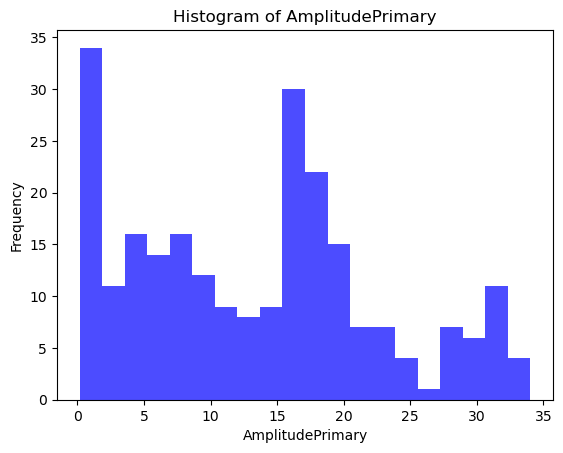

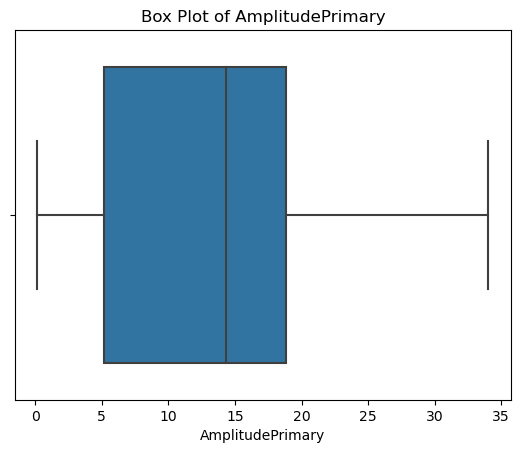

In [37]:
import matplotlib.pyplot as plt

plt.hist(df['AmplitudePrimary'], bins=20, color='blue', alpha=0.7)
plt.xlabel('AmplitudePrimary')
plt.ylabel('Frequency')
plt.title('Histogram of AmplitudePrimary')
plt.show()

import seaborn as sns

sns.boxplot(x=df['AmplitudePrimary'])
plt.xlabel('AmplitudePrimary')
plt.title('Box Plot of AmplitudePrimary')
plt.show()

In [35]:
import torch
import tensorflow as tf
from transformers import BertTokenizer, BertModel

/Users/sanmatichoudhary/anaconda3/lib/python3.11/site-packages/transformers/utils/generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


## Downstream Tasks - 

In [55]:
sentence_embeddings = bert_model(binned_data)


[-1.67487845e-01  2.42190436e-01  6.45469248e-01 -3.69808942e-01
 -4.63786244e-01  1.25748083e-01  2.22381890e-01  1.60082743e-01
  3.16915870e-01 -1.06755711e-01 -4.77621704e-01 -1.76986381e-01
 -1.18623286e-01  3.00840914e-01  3.62904429e-01  6.49887323e-01
  1.89609081e-01 -5.11253849e-02  4.48653758e-01  6.20230317e-01
  2.94139922e-01  3.28720927e-01 -3.91867943e-02  1.79010496e-01
  2.99472123e-01 -4.21757959e-02 -3.32447201e-01 -4.36459213e-01
 -1.43198296e-01 -3.09454068e-03  2.53475249e-01 -2.74234176e-01
 -2.10060179e-01 -9.93856788e-02  4.38264966e-01 -5.59017658e-02
  5.10979667e-02  3.05827260e-01  6.81590214e-02  3.49561721e-01
 -1.74624011e-01 -2.90758997e-01 -1.12271033e-01 -6.51770234e-02
  3.93569648e-01 -2.18195170e-01 -6.17728293e-01 -1.42087281e-01
 -8.01282451e-02 -3.11024159e-01 -6.25728428e-01 -3.19566689e-02
 -1.21984310e-01 -3.89400959e-01 -1.99808463e-01  1.29368126e-01
 -1.07983224e-01 -5.73572069e-02 -3.00001055e-01  9.72655341e-02
 -5.38074136e-01  1.96965

### Logisitic Regression

In [56]:
X_train, X_test, y_train, y_test = train_test_split(sentence_embeddings, df['Normal'], test_size=0.2, random_state=42)

# Initialize logistic regression model
lr_model = LogisticRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Evaluate the model
accuracy = lr_model.score(X_test, y_test)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.6730769230769231


### Random Forest

In [42]:
X_train, X_test, y_train, y_test = train_test_split(sentence_embeddings, df['Normal'], test_size=0.2, random_state=42)


param_grid = {
    'n_estimators': [50,100,150],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],   # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]      # Minimum number of samples required at each leaf node
}

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', verbose = 2)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_de

[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=150; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=150; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=150; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=150; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=1

[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total ti

[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=150; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=150; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=150; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=150; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=150; total tim

[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.3s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.2s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.3s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   

[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.3s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.3s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.3s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time

[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=150; total time=   0.2s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=150; total time=   0.2s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=150; total time=   0.2s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=150; total time=   0.2s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time

In [57]:
model = RandomForestClassifier(random_state=42, max_depth = None, n_estimators = 50, min_samples_leaf = 2, min_samples_split = 10)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.6538461538461539
Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.36      0.50        25
         1.0       0.61      0.93      0.74        27

    accuracy                           0.65        52
   macro avg       0.71      0.64      0.62        52
weighted avg       0.71      0.65      0.62        52



### SVM

In [40]:
param_grid = {
    'C': [0.1, 1, 10, 100],           # Regularization parameter
    'gamma': [1, 0.1, 0.01, 0.001]   # Kernel coefficient for 'rbf' and 'poly' kernels
#     'kernel': ['rbf', 'poly', 'linear']  # Kernel type
}

# Initialize the SVM model
svm = SVC(random_state=42)

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)


Best Parameters: {'C': 100, 'gamma': 0.01}
Best Score: 0.6323170731707318


In [58]:
model = SVC(kernel='rbf', random_state=42, C = 100, gamma = .01)  # You can choose different kernels such as 'linear', 'poly', 'rbf', etc.

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.6730769230769231
Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.40      0.54        25
         1.0       0.62      0.93      0.75        27

    accuracy                           0.67        52
   macro avg       0.73      0.66      0.64        52
weighted avg       0.73      0.67      0.65        52



## Equal Binning 

In [59]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

print(df.AmplitudePrimary)
df['AmplitudePrimary_Bin'] = pd.cut(df['AmplitudePrimary'], bins=5, labels=False)
df['AmplitudeSecondary_Bin'] = pd.cut(df['AmplitudeSecondary'], bins=5, labels=False)
df['Latency_Bin'] = pd.cut(df['Latency'], bins=5, labels=False)
df['CorrectiveSaccade_Bin'] = pd.cut(df['CorrectiveSaccade'], bins=5, labels=False)
df_new = df[['AmplitudePrimary_Bin', 'AmplitudeSecondary_Bin', 'Latency_Bin', 'CorrectiveSaccade_Bin']]
df_new

0       7.905335
1      17.381435
2      29.415535
3      10.173487
4       6.801426
5       7.733378
6      12.924696
7       5.696865
8      16.259921
9      23.513123
10     21.909296
11     15.020334
12     21.560429
13     16.659555
14      5.397779
15      0.400352
16     16.640673
17     23.327566
18      1.487398
19     18.854921
20     17.688000
21     31.806278
22     16.850883
23     30.903177
24     19.113457
25     32.813337
26     17.139464
27     20.347049
28     17.260865
29      1.765557
30     16.833260
31      1.461755
32     18.337796
33     17.674022
34      4.237769
35     17.168579
36     25.305812
37     12.013802
38      1.919077
39      6.281644
40     16.345316
41     16.495857
42      6.433093
43      4.807845
44     16.518770
45      4.313227
46     10.630570
47      4.555170
48      2.776047
49      0.827697
50      9.165246
51      4.186462
52     14.726808
53     23.144415
54     24.996951
55     17.030066
56      8.418091
57     19.514065
58     17.6815

,AmplitudePrimary_Bin,AmplitudeSecondary_Bin,Latency_Bin,CorrectiveSaccade_Bin
0,1,0,0,0
1,2,0,1,0
2,4,0,1,0
3,1,0,0,0
4,0,1,1,1
5,1,1,0,1
6,1,0,0,0
7,0,2,0,2
8,2,3,0,0
9,3,0,0,0


In [62]:
sentence_embeddings = bert_model(df_new)


[-1.67487845e-01  2.42190436e-01  6.45469248e-01 -3.69808942e-01
 -4.63786244e-01  1.25748083e-01  2.22381890e-01  1.60082743e-01
  3.16915870e-01 -1.06755711e-01 -4.77621704e-01 -1.76986381e-01
 -1.18623286e-01  3.00840914e-01  3.62904429e-01  6.49887323e-01
  1.89609081e-01 -5.11253849e-02  4.48653758e-01  6.20230317e-01
  2.94139922e-01  3.28720927e-01 -3.91867943e-02  1.79010496e-01
  2.99472123e-01 -4.21757959e-02 -3.32447201e-01 -4.36459213e-01
 -1.43198296e-01 -3.09454068e-03  2.53475249e-01 -2.74234176e-01
 -2.10060179e-01 -9.93856788e-02  4.38264966e-01 -5.59017658e-02
  5.10979667e-02  3.05827260e-01  6.81590214e-02  3.49561721e-01
 -1.74624011e-01 -2.90758997e-01 -1.12271033e-01 -6.51770234e-02
  3.93569648e-01 -2.18195170e-01 -6.17728293e-01 -1.42087281e-01
 -8.01282451e-02 -3.11024159e-01 -6.25728428e-01 -3.19566689e-02
 -1.21984310e-01 -3.89400959e-01 -1.99808463e-01  1.29368126e-01
 -1.07983224e-01 -5.73572069e-02 -3.00001055e-01  9.72655341e-02
 -5.38074136e-01  1.96965

### Logisitic Reg

In [63]:
X_train, X_test, y_train, y_test = train_test_split(sentence_embeddings, df['Normal'], test_size=0.2, random_state=42)

# Initialize logistic regression model
lr_model = LogisticRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Evaluate the model
accuracy = lr_model.score(X_test, y_test)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.6730769230769231


### RF

In [42]:
X_train, X_test, y_train, y_test = train_test_split(sentence_embeddings, df['Normal'], test_size=0.2, random_state=42)


param_grid = {
    'n_estimators': [50,100,150],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],   # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]      # Minimum number of samples required at each leaf node
}

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', verbose = 2)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_de

[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=150; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=150; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=150; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=150; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=1

[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total ti

[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=150; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=150; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=150; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=150; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=150; total tim

[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.3s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.2s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.3s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   

[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.3s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.3s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.3s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time

[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=150; total time=   0.2s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=150; total time=   0.2s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=150; total time=   0.2s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=150; total time=   0.2s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time

In [64]:
X_train, X_test, y_train, y_test = train_test_split(sentence_embeddings, df['Normal'], test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42, max_depth = None, n_estimators = 50, min_samples_leaf = 2, min_samples_split = 10)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.6538461538461539
Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.36      0.50        25
         1.0       0.61      0.93      0.74        27

    accuracy                           0.65        52
   macro avg       0.71      0.64      0.62        52
weighted avg       0.71      0.65      0.62        52



### SVM

In [40]:
param_grid = {
    'C': [0.1, 1, 10, 100],           # Regularization parameter
    'gamma': [1, 0.1, 0.01, 0.001]   # Kernel coefficient for 'rbf' and 'poly' kernels
#     'kernel': ['rbf', 'poly', 'linear']  # Kernel type
}

# Initialize the SVM model
svm = SVC(random_state=42)

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)


Best Parameters: {'C': 100, 'gamma': 0.01}
Best Score: 0.6323170731707318


In [65]:
X_train, X_test, y_train, y_test = train_test_split(sentence_embeddings, df['Normal'], test_size=0.2, random_state=42)

model = SVC(kernel='rbf', random_state=42, C = 100, gamma = .01)  # You can choose different kernels such as 'linear', 'poly', 'rbf', etc.

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.6730769230769231
Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.40      0.54        25
         1.0       0.62      0.93      0.75        27

    accuracy                           0.67        52
   macro avg       0.73      0.66      0.64        52
weighted avg       0.73      0.67      0.65        52



## Binning based on Distribution 

In [70]:
num_bins = 5
# Compute quantiles to determine bin boundaries dynamically
quantiles = np.linspace(0, 1, num_bins + 1)  # Divide the data into equal-sized intervals
X = df[['AmplitudePrimary', 'AmplitudeSecondary', 'Latency', 'CorrectiveSaccade']]
y = df.Normal
bin_boundaries = np.quantile(X, quantiles, axis=0)

# Apply binning to your data
binned_data = np.zeros_like(X, dtype=int)
for feature_idx in range(X.shape[1]):
    feature_values = X.iloc[:, feature_idx]
    binned_feature = np.digitize(feature_values, bin_boundaries[:, feature_idx], right=True)
    binned_data[:, feature_idx] = binned_feature

binned_data = pd.DataFrame(binned_data)
display(binned_data)
sentence_embeddings = bert_model(binned_data)

,0,1,2,3
0,2,2,3,1
1,4,1,4,3
2,5,2,4,3
3,3,2,3,1
4,2,4,4,5
5,2,5,2,5
6,3,3,4,3
7,2,5,2,5
8,3,5,1,2
9,5,3,1,3


[-2.30904877e-01  1.96057960e-01  5.43950319e-01 -4.49674606e-01
 -4.28453445e-01 -1.78921387e-01  5.84471300e-02  2.70070553e-01
  1.26140028e-01 -8.63743722e-02 -2.84493238e-01 -3.51612419e-01
  6.42190035e-03  2.12180734e-01 -1.30345047e-01  6.84836447e-01
  9.73673165e-02 -1.63446262e-01  5.01138210e-01  1.99921086e-01
  2.40033358e-01  3.44559699e-02 -1.61010608e-01  3.32681894e-01
  4.35284942e-01  2.26147011e-01 -1.93333626e-01  1.72851346e-02
 -4.45123315e-02 -1.09330289e-01  4.17545468e-01 -3.55238408e-01
 -2.22847193e-01 -3.04761171e-01  6.07205331e-01 -2.49131247e-02
  1.16077475e-01  1.47020996e-01 -1.30235478e-01  4.25744176e-01
  2.56495811e-02 -2.73289800e-01  2.98213363e-01  4.90400344e-02
  6.56387448e-01 -1.22017384e-01 -5.46150506e-01  2.82524854e-01
 -3.26285928e-01 -7.97122344e-02 -4.77622390e-01  2.35938370e-01
 -1.21509872e-01 -3.01326573e-01 -9.67554152e-02  1.83158666e-01
 -9.56849679e-02  2.79482864e-02 -4.98978347e-01  6.03464171e-02
 -5.34548044e-01  1.63551

### LR

In [71]:
X_train, X_test, y_train, y_test = train_test_split(sentence_embeddings, df['Normal'], test_size=0.2, random_state=42)

# Initialize logistic regression model
lr_model = LogisticRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Evaluate the model
accuracy = lr_model.score(X_test, y_test)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.5576923076923077


/Users/sanmatichoudhary/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### RF

In [72]:
X_train, X_test, y_train, y_test = train_test_split(sentence_embeddings, df['Normal'], test_size=0.2, random_state=42)


param_grid = {
    'n_estimators': [50,100,150],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],   # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]      # Minimum number of samples required at each leaf node
}

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', verbose = 2)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_de

[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=150; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=150; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=150; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=150; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=1

[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total ti

[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=150; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=150; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=150; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=150; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=150; total tim

[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.3s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.3s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.3s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   

[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.3s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.3s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.3s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.3s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total tim

[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=150; total time=   0.3s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=150; total time=   0.3s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=150; total time=   0.3s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=

In [74]:
X_train, X_test, y_train, y_test = train_test_split(sentence_embeddings, df['Normal'], test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42, max_depth = None, n_estimators = 50, min_samples_leaf = 2, min_samples_split = 10)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.5961538461538461
Classification Report:
              precision    recall  f1-score   support

         0.0       0.58      0.60      0.59        25
         1.0       0.62      0.59      0.60        27

    accuracy                           0.60        52
   macro avg       0.60      0.60      0.60        52
weighted avg       0.60      0.60      0.60        52



### SVM

In [75]:
param_grid = {
    'C': [0.1, 1, 10, 100],           # Regularization parameter
    'gamma': [1, 0.1, 0.01, 0.001]   # Kernel coefficient for 'rbf' and 'poly' kernels
#     'kernel': ['rbf', 'poly', 'linear']  # Kernel type
}

# Initialize the SVM model
svm = SVC(random_state=42)

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)


Best Parameters: {'C': 1, 'gamma': 1}
Best Score: 0.5682926829268293


In [76]:
X_train, X_test, y_train, y_test = train_test_split(sentence_embeddings, df['Normal'], test_size=0.2, random_state=42)

model = SVC(kernel='rbf', random_state=42, C = 1, gamma = 1)  # You can choose different kernels such as 'linear', 'poly', 'rbf', etc.

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.5769230769230769
Classification Report:
              precision    recall  f1-score   support

         0.0       0.54      0.84      0.66        25
         1.0       0.69      0.33      0.45        27

    accuracy                           0.58        52
   macro avg       0.62      0.59      0.55        52
weighted avg       0.62      0.58      0.55        52

